In [1]:
%matplotlib inline

from keras.utils import get_file
import os
import gensim
import numpy as np
import geopandas as gpd
from IPython.core.pylabtools import figsize
import csv 

figsize(120, 80)

Using TensorFlow backend.
C:\Users\bjoer\Anaconda3\envs\venv3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
MODEL = 'GoogleNews-vectors-negative300.bin'
path = MODEL + '.gz'+ 'https://s3.amazonaws.com/dl4j-distribution/%s.gz'
unzipped = os.path.join('generated', MODEL)

if not os.path.isdir('generated'):
    os.mkdir('generated')
if not os.path.isfile(unzipped):
    get_file(path % MODEL)
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'],
                          stdin=open(path),
                          stdout=fout
                         )
        zcat.wait()

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

In [4]:
countries = list(csv.DictReader(open('data/countries.csv')))

In [5]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

In [6]:
def rank_countries(term, topn=10, field='name'):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx])) 
            for idx in reversed(np.argsort(dists)[-topn:])]

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [8]:
def map_term(term):
    
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd')

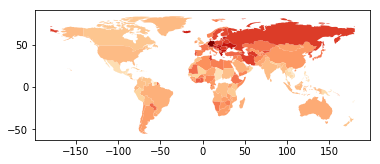

In [9]:
map_term('Angela_Merkel')

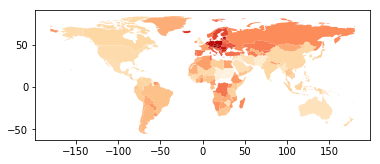

In [10]:
map_term('Karneval')

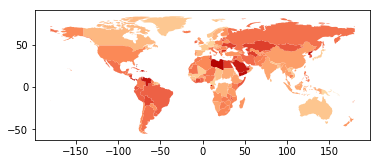

In [11]:
map_term('Donald_Trump')

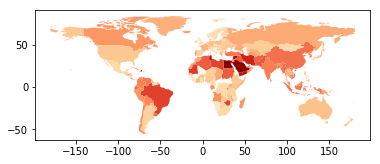

In [12]:
map_term('Facebook')

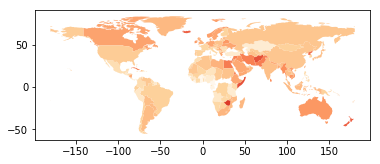

In [13]:
map_term('Pink_Floyd')

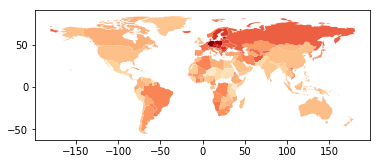

In [14]:
map_term('Rammstein')